In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train.csv', index_col ='Loan_ID') #index_col to make indexing based on specified value

In [3]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Boolean indexing
# a list of all females who are not graduate and got a loan

data.loc[(data["Gender"]=="Female") & (data['Education'] =="Not Graduate") & (data["Loan_Status"]=="Y"), ['Gender','Education','Loan_Status']]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


In [5]:
# Apply function
# Apply returns some value after passing each row/column of a data frame with some function. 
# The function can be both default or user-defined

# Create a new function
def num_missing(x):
    return sum(x.isnull())

# Applying per column
print("Missing Values per Column")
print(data.apply(num_missing, axis=0)) #axis = 0 defines to apply function to each column

#Applying per row 
print("Missing Values per Row")
print(data.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing Values per Column
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing Values per Row
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


In [6]:
# Imputing missing files with fillna()
# Example use mode to impute missing values

data['Gender'].fillna(data['Gender'].mode().iloc[0], inplace=True)
data['Married'].fillna(data['Married'].mode().iloc[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode().iloc[0], inplace=True)

In [7]:
# check
data.apply(num_missing,axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Pivot table
# For instance, in this case, a key column is “LoanAmount” which has missing values. 
# We can impute it using mean amount of each ‘Gender’, ‘Married’ and ‘Self_Employed’ group.

impute_grps = data.pivot_table(values=['LoanAmount'], index=['Gender','Married','Self_Employed'], aggfunc = np.mean)

In [9]:
impute_grps

LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833

In [10]:
# MultiIndexing
#iterate only through rows with missing LoanAmount
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([row['Gender'], row['Married'], row['Self_Employed']])
    data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]

In [11]:
data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# Crosstab
# Get initial view/feel of the data
# Here, we can validate some basic hypothesis. 
# For instance, in this case, “Credit_History” is expected to affect the loan status significantly.

#Returns a dataframe
# if aggfunc not specified, return frequency/contingency table
pd.crosstab(data['Credit_History'],data['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [13]:
# instead,percentages can be more intuitive in making some quick insights. 
#We can do this using the apply function:

def percConvert(ser):
    return ser/float(ser[-1]) # -1 means indexing refers to the last element in the end

pd.crosstab(data['Credit_History'],data['Loan_Status'], margins=True).apply(percConvert,axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


In [14]:
# Merging dataframes
#Merging dataframes become essential when we have information coming from different sources to be collated. 

# Consider a hypothetical case where the average property rates (INR per sq meters) is available for different property types.
#Creating new dataframe
#>>> d = {'col1': [1, 2], 'col2': [3, 4]}
#>>> df = pd.DataFrame(data=d)
#>>> df
   #col1  col2
#0     1     3
#1     2     4


prop_rates = pd.DataFrame([1000,5000,12000], index=['Rural','Semiurban','Urban'], columns=['rates'])

In [15]:
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


In [16]:
#Merge new info with original dataframe
data_merged = data.merge(right=prop_rates, how='inner', right_index=True, left_on ='Property_Area')

In [17]:
data_merged.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,rates
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,129.936937,360.0,1.0,Urban,Y,12000
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,12000
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,12000
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,12000
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,12000


In [18]:
# Sorting dataframes based on multiple columns
data_sorted = data.sort_values(by=['ApplicantIncome','CoapplicantIncome'], ascending=False)

In [19]:
data_sorted.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.000000,360.0,0.0,Rural,N
LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.000000,180.0,1.0,Urban,Y
LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.000000,300.0,1.0,Urban,Y
LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.000000,180.0,0.0,Semiurban,Y
LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.000000,360.0,1.0,Semiurban,Y
LP002422,Male,No,1,Graduate,No,37719,0.0,152.000000,360.0,1.0,Semiurban,Y
LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.000000,360.0,1.0,Semiurban,N
LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.000000,360.0,1.0,Rural,Y
LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.000000,360.0,NaN,Urban,Y


In [20]:
# Plotting - boxplot and histogram
import matplotlib.pyplot as plt
data.boxplot(column="ApplicantIncome", by='Loan_Status')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A77C4B518>,
      dtype=object)

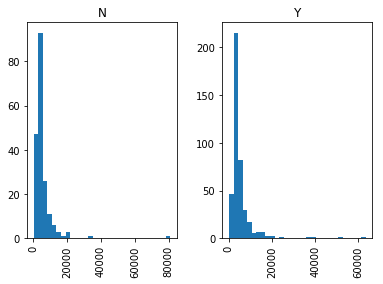

In [21]:
data.hist(column='ApplicantIncome', by='Loan_Status', bins=30)

In [22]:
# Cut function for binning
# Sometimes numerical values make more sense if clustered together. 

# define binning function :
def binning(col,cut_points,labels=None):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()
    
    #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval] #appending lists
    
    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)
    
    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points, labels=labels, include_lowest=True)
    
    return colBin

In [23]:
# Example: Binning loan amount to low-med-high-v high
cut_points = [90,140,190]
labels =['low','medium','high','very high']
# do binning and add to existing dataframe
data['LoanAmount_Bin']=binning(data['LoanAmount'],cut_points, labels)

In [24]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Bin
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,129.936937,360.0,1.0,Urban,Y,medium
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,medium
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,low
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,medium
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,high


In [25]:
data['LoanAmount_Bin'].value_counts(sort=False)

low          104
medium       273
high         146
very high     91
Name: LoanAmount_Bin, dtype: int64

In [26]:
data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
dtype: object

In [27]:
#after dropna
data_removena = data.dropna()
data_removena.apply(num_missing, axis=0)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_Bin       0
dtype: int64

In [28]:
data_removena['Dependents'].value_counts()

0     305
2      95
1      89
3+     47
Name: Dependents, dtype: int64

In [29]:
data_removena['Property_Area'].value_counts()

Semiurban    209
Urban        168
Rural        159
Name: Property_Area, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Iterating over all the common columns in train and test
for col in data_removena.columns.values :
    # Encode only categorical variables
    if data_removena[col].dtypes =='object': #object type indicates categorical 
        le.fit(data_removena[col].values) #generate encoding
        # applying transforamtion
        data_removena[col]= le.transform(data_removena[col])
    

In [33]:
data_removena['Dependents'].value_counts()

0    305
2     95
1     89
3     47
Name: Dependents, dtype: int64

In [34]:
data_removena['Property_Area'].value_counts()

1    209
2    168
0    159
Name: Property_Area, dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

one_hot = data_removena

In [37]:
columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area','Loan_Status']
for col in columns :
    enc.fit(data_removena[[col]])
    #Fitting one hot encoding
    temp = enc.transform(data_removena[[col]])
    #changing the encoded features into a data frame with new column namaes
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data_removena[col].value_counts().index])
    # In side by side concatenation index values should be same
    temp=temp.set_index(data_removena.index.values)
    # adding the new One Hot Encoded varibales to the train data frame
    one_hot=pd.concat([one_hot,temp],axis=1)

In [38]:
data_removena.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Bin
Loan_ID,,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,129.936937,360.0,1.0,2,1,medium
LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,medium
LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,low
LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,medium
LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,high


In [43]:
one_hot.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Property_Area_1,Property_Area_2,Property_Area_0,Loan_Status_1,Loan_Status_0
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,129.936937,360.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
